# **Loading Datas :**

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
#https://drive.google.com/file/d/1lFUeYveD2qqI6sjH57BwK8EtK2G_LFyP/view?usp=sharing

!pip install --upgrade --no-cache-dir gdown      # Downloading the dataset file from google colab
!gdown 1lFUeYveD2qqI6sjH57BwK8EtK2G_LFyP

Downloading...
From: https://drive.google.com/uc?id=1lFUeYveD2qqI6sjH57BwK8EtK2G_LFyP
To: /content/Dataset.zip
100% 4.43M/4.43M [00:00<00:00, 213MB/s]


In [90]:
!mkdir /content/Dataset
!unzip /content/Dataset.zip -d /content/Dataset


mkdir: cannot create directory ‘/content/Dataset’: File exists
Archive:  /content/Dataset.zip
replace /content/Dataset/130.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [91]:
import scipy.io as scio

# Load the .mat files:

mat_105 = scio.loadmat('/content/Dataset/105.mat')
# variables=scio.whosmat('/content/DataMAT/105.mat')
# print(variables)
mat_105_DE=mat_105['X105_DE_time']
mat_105_FE=mat_105['X105_FE_time']

mat_118 = scio.loadmat('/content/Dataset/118.mat')
mat_118_DE=mat_118['X118_DE_time']
mat_118_FE=mat_118['X118_FE_time']

mat_130 = scio.loadmat('/content/Dataset/130.mat')
mat_130_DE=mat_130['X130_DE_time']
mat_130_FE=mat_130['X130_FE_time']

mat_97 = scio.loadmat('/content/Dataset/97.mat')
mat_97_DE=mat_97['X097_DE_time']
mat_97_FE=mat_97['X097_FE_time']


# **Part 1**

## **1. M & N window**

### **for 105.mat**

In [98]:
import pandas as pd
import numpy as np

#convert data to dataframe:
df_105_DE=pd.DataFrame(mat_105_DE)
df_105_FE=pd.DataFrame(mat_105_FE)

fault_105=[]

for i in range(500):
   new=np.concatenate([df_105_DE.values[i*200:200+i*200], df_105_FE.values[i*200:200+i*200]])
   new=np.reshape(new,(200,2))
   fault_105.append(new)

fault_105 = np.squeeze(fault_105)
print(fault_105.shape)

(500, 200, 2)


### **for 97.mat**

In [99]:
import pandas as pd
import numpy as np

#convert data to dataframe:
df_97_DE=pd.DataFrame(mat_97_DE)
df_97_FE=pd.DataFrame(mat_97_FE)

normal_97=[]

for i in range(700):
   new=np.concatenate([df_97_DE.values[i*200:200+i*200], df_97_FE.values[200*i:200+200*i]])
   new=np.reshape(new,(200,2))
   normal_97.append(new)

normal_97 = np.squeeze(normal_97)
print(normal_97.shape)

(700, 200, 2)


### **for 118.mat**

In [100]:
import pandas as pd
import numpy as np

#convert data to dataframe:
df_118_DE=pd.DataFrame(mat_118_DE)
df_118_FE=pd.DataFrame(mat_118_FE)

fault_118=[]

for i in range(500):
   new=np.concatenate([df_118_DE.values[i*200:200+i*200], df_118_FE.values[200*i:200+200*i]])
   new=np.reshape(new,(200,2))
   fault_118.append(new)

fault_118 = np.squeeze(fault_118)
print(fault_118.shape)

(500, 200, 2)


### **for 130.mat**

In [101]:
import pandas as pd
import numpy as np

#convert data to dataframe:
df_130_DE=pd.DataFrame(mat_130_DE)
df_130_FE=pd.DataFrame(mat_130_FE)

fault_130=[]

for i in range(500):
   new=np.concatenate([df_130_DE.values[i*200:200+i*200], df_130_FE.values[200*i:200+200*i]])
   new=np.reshape(new,(200,2))
   fault_130.append(new)

fault_130 = np.squeeze(fault_130)
print(fault_130.shape)

(500, 200, 2)


### **Total Data**

In [102]:
#-----*****Total Data***** ------ :
X = np.concatenate([normal_97, fault_105, fault_118,fault_130], axis=0)
print(X.shape)
Y = np.concatenate((np.zeros(len(normal_97)), np.ones(len(fault_105)) , 2*np.ones(len(fault_118)) , 3*np.ones(len(fault_130))))
print(Y.shape)

(2200, 200, 2)
(2200,)


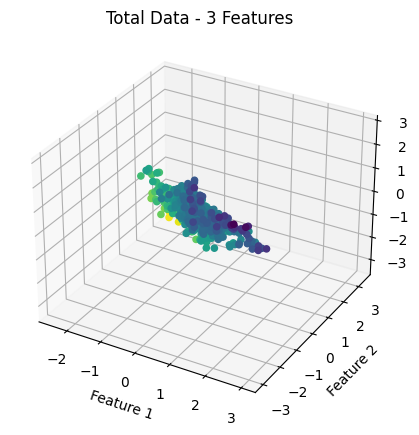

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

# Plot the data with a different colormap
x = X[:, 0]
y = X[:, 1]
z = X[:, 2]

# Plot the data with a different colormap
#'viridis', 'jet', 'rainbow', and 'cividis'
ax.scatter(x, y, z, c=y, cmap='viridis', alpha=1)

# Set the labels for the axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Total Data - 3 Features ')
# Show the plot
plt.show()

## **2. Feature Selection & New Data Generation**

In [104]:
import numpy as np
from scipy.stats import skew , kurtosis

# Peak
peak_X = X.max(axis=1)

#Peak to Peak
pp_X = np.ptp(X , axis=1)

#Crest factor
Crest_factor_X = np.max(X , axis=1) / np.sqrt(np.mean(X**2 , axis=1))

# Standard deviation
std_X = X.std(axis=1)

# Mean
mean_X = np.mean(X , axis=1)

# Root mean square
RMS_X = np.sqrt(np.mean(X**2 , axis=1))

# Kurtosis
Kurtosis_X =kurtosis(X , axis=1)

# Skewness
skew_X = skew(X , axis=1)

# Absolute mean
abs_mean_X = np.mean(np.abs(X), axis=1)

In [105]:
# Create new dataset
X_new = np.concatenate([abs_mean_X , skew_X , Kurtosis_X , RMS_X , mean_X , std_X , Crest_factor_X , pp_X ,  peak_X] , axis=1)
print("New dataset shape :", X_new.shape)

New dataset shape : (2200, 18)


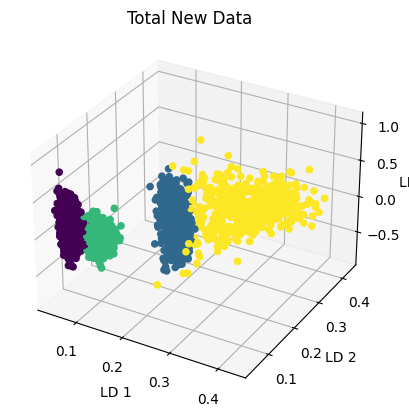

In [106]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data with a different colormap
x = X_new[:, 0]
y = X_new[:, 1]
z = X_new[:, 2]

ax.scatter(x, y, z,c=Y, cmap='viridis', alpha=1)

# Set the labels for the axes
ax.set_xlabel('LD 1')
ax.set_ylabel('LD 2')
ax.set_zlabel('LD 3')
plt.title('Total New Data  ')
# Show the plot
plt.show()

## **3. Data Normalizing**

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_new)

In [108]:
data= pd.DataFrame(X_normalized,columns=['std_1','std_2','peak_1','peak_2', 'skew_1', 'skew_2',
                                  'kurtosis_1', 'kurtosis_2', 'crest_factor_1', 'crest_factor_2','ptp_1', 'ptp_2',
                                  'mean_1', 'mean_2', 'RMS_1', 'RMS_2', 'abs_mean_1', 'abs_mean_2'])

In [109]:
data.head()

,std_1,std_2,peak_1,peak_2,skew_1,skew_2,kurtosis_1,kurtosis_2,crest_factor_1,crest_factor_2,ptp_1,ptp_2,mean_1,mean_2,RMS_1,RMS_2,abs_mean_1,abs_mean_2
0,0.087913,0.088696,0.400343,0.482547,0.039830,0.046474,0.057053,0.056695,0.451496,0.439395,0.054730,0.054697,0.190639,0.234159,0.036536,0.037509,0.033919,0.040492
1,0.042608,0.044516,0.575560,0.662372,0.022632,0.030379,0.027161,0.028339,0.488726,0.474105,0.023079,0.024710,0.178720,0.142569,0.014409,0.014795,0.016477,0.014890
2,0.063682,0.070697,0.478546,0.548790,0.011984,0.015685,0.040734,0.042500,0.325291,0.324159,0.039545,0.041551,0.083995,0.086394,0.020407,0.021916,0.013580,0.015949
3,0.016028,0.016814,0.575455,0.648636,0.054321,0.054135,0.010158,0.011197,0.322645,0.325543,0.008055,0.009240,0.312534,0.246183,0.017293,0.013218,0.018166,0.014596
4,0.046342,0.051132,0.421409,0.480721,0.040943,0.045995,0.031183,0.033596,0.359345,0.353501,0.029306,0.032045,0.124579,0.159299,0.023029,0.026501,0.013272,0.019260


## **4. Data Shuffling & Spliting**

In [110]:
from sklearn.model_selection import train_test_split

# Shuffle the data
#shuffled_data = data.sample(frac=1, random_state=14)

# Split the shuffled data into 70% training and 30% Temp sets
X_train, X_temp, y_train, y_temp = train_test_split(data, Y, test_size=0.3, random_state=14)

# Split the shuffled data into 15% Test and 15% Validation sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=14)

# Dimension of Sets
print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (1540, 18), (1540,)
Validation set: (330, 18), (330,)
Test set: (330, 18), (330,)


# **Part 2**

In [111]:
X_train.shape[1]

18

In [112]:
y_train.shape

(1540,)

In [113]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.datasets import make_classification

num_classes = 4
input_shape= X_train.shape[1]

MLP = Sequential()
MLP.add(Dense(24, input_dim=input_shape, activation='relu'))
MLP.add(Dense(16,activation='relu'))
MLP.add(Dense(8,activation='relu'))
MLP.add(Dense(num_classes, activation='softmax'))
MLP.summary()

# Set the learning rate of the optimizer
lr = 0.0005
opt = Adam(lr=lr)

# Compile the model
#categorical_crossentropy for multi-class classification tasks with one-hot encoded labels
MLP.compile(optimizer=opt ,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=MLP.fit(X_train, y_train, epochs=150, batch_size=64,validation_data=(X_val, y_val))

# Predict classes for test set
y_pred = np.argmax(MLP.predict(X_test), axis=-1)



Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 24)                456       
                                                                 
 dense_85 (Dense)            (None, 16)                400       
                                                                 
 dense_86 (Dense)            (None, 8)                 136       
                                                                 
 dense_87 (Dense)            (None, 4)                 36        
                                                                 
Total params: 1028 (4.02 KB)
Trainable params: 1028 (4.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/150
25/25 [==============================] - 6s 63ms/step - loss: 1.4496 - accuracy: 0.2429 - val_loss: 1.4018 - val_accuracy: 0.3273
Epoch 2/150
25/25 [==============================] - 0s 16ms/step - loss: 1.3736 - accuracy: 0.3591 - val_loss: 1.3524 - val_accuracy: 0.2970
Epoch 3/150
25/25 [==============================] - 0s 16ms/step - loss: 1.3304 - accuracy: 0.3305 - val_loss: 1.3162 - val_accuracy: 0.3515
Epoch 4/150
25/25 [==============================] - 0s 14ms/step - loss: 1.2874 - accuracy: 0.4091 - val_loss: 1.2637 - val_accuracy: 0.3848
Epoch 5/150
25/25 [==============================] - 0s 11ms/step - loss: 1.2159 - accuracy: 0.4221 - val_loss: 1.1688 - val_accuracy: 0.4667
Epoch 6/150
25/25 [==============================] - 0s 13ms/step - loss: 1.1082 - accuracy: 0.5506 - val_loss: 1.0464 - val_accuracy: 0.6000
Epoch 7/150
25/25 [==============================] - 0s 15ms/step - loss: 0.9823 - accuracy: 0.6149 - val_loss: 0.9182 - val_accuracy: 0.6333
Epoch 

In [114]:
# Evaluate the performance of the model on the Validation data
test_loss, test_acc = MLP.evaluate(X_test, y_test)
print('\n\nTest loss:', test_loss)
print('Test accuracy:', test_acc)

# Calculate different metrics to evaluate the performance of the MLP
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("\n\nAccuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall:{:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

11/11 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9970


Test loss: 0.003511884016916156
Test accuracy: 0.9969696998596191


Accuracy: 1.00
Precision: 1.00
Recall:1.00
F1 score: 1.00




Classification Report :
               precision    recall  f1-score   support

      Normal       0.99      1.00      1.00       117
     Fault 1       1.00      1.00      1.00        74
     Fault 2       1.00      0.99      0.99        73
     Fault 3       1.00      1.00      1.00        66

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



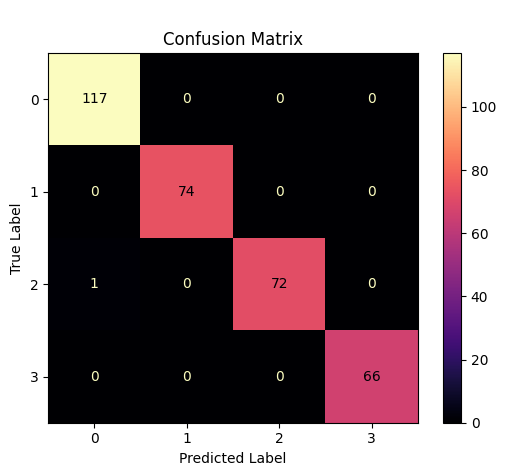

In [115]:
# Print classification report
print("\n\nClassification Report :\n",classification_report(y_test, y_pred , target_names=['Normal', 'Fault 1', 'Fault 2', 'Fault 3']))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot(cmap='magma', colorbar=True)
plt.title("\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#viridis,coolwarm,Greys,magma,'jet', 'rainbow', and 'cividis'


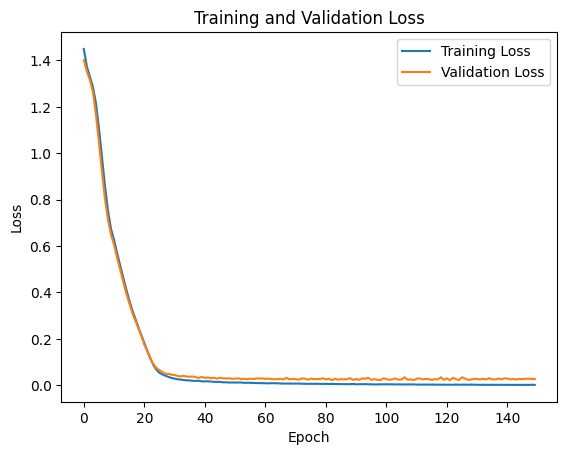

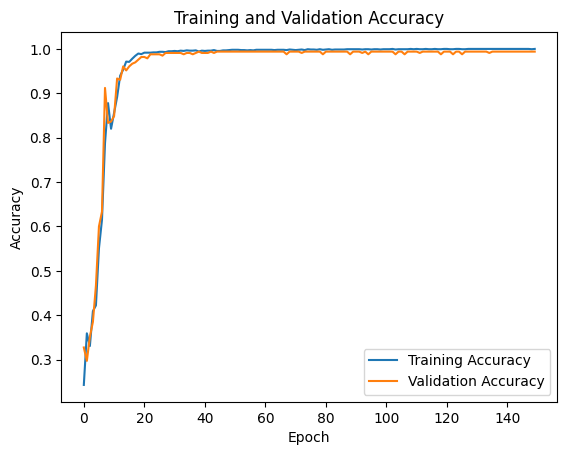

In [116]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Part 3**

In [121]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD ,RMSprop

from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.datasets import make_classification

num_classes = 4
input_shape= X_train.shape[1]

MLP = Sequential()
MLP.add(Dense(24, input_dim=input_shape, activation='relu'))
MLP.add(Dense(16,activation='relu'))
MLP.add(Dense(8,activation='relu'))
MLP.add(Dense(num_classes, activation='softmax'))
MLP.summary()

# Set the learning rate of the optimizer
lr = 0.0005
#opt = SGD(lr=lr, momentum=0.9)
#opt = SGD(lr=lr)
opt =RMSprop(learning_rate=0.0005)

# Compile the model
#categorical_crossentropy for multi-class classification tasks with one-hot encoded labels
#MLP.compile(optimizer=opt ,loss='mean_squared_error', metrics=['accuracy'])
MLP.compile(optimizer=opt ,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=MLP.fit(X_train, y_train, epochs=150, batch_size=64,validation_data=(X_val, y_val))

# Predict classes for test set
y_pred = np.argmax(MLP.predict(X_test), axis=-1)



Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 24)                456       
                                                                 
 dense_93 (Dense)            (None, 16)                400       
                                                                 
 dense_94 (Dense)            (None, 8)                 136       
                                                                 
 dense_95 (Dense)            (None, 4)                 36        
                                                                 
Total params: 1028 (4.02 KB)
Trainable params: 1028 (4.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/150
25/25 [==============================] - 2s 23ms/step - loss: 1.3931 - accuracy: 0.2948 - val_loss: 1.3743 - val_accuracy: 0.4394
Epoch 2/150

In [123]:
# Evaluate the performance of the model on the Validation data
test_loss, test_acc = MLP.evaluate(X_test, y_test)
print('\n\nTest loss:', test_loss)
print('Test accuracy:', test_acc)

# Calculate different metrics to evaluate the performance of the MLP
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("\n\nAccuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall:{:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

11/11 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9970


Test loss: 0.008416782133281231
Test accuracy: 0.9969696998596191


Accuracy: 1.00
Precision: 1.00
Recall:1.00
F1 score: 1.00




Classification Report :
               precision    recall  f1-score   support

      Normal       0.99      1.00      1.00       117
     Fault 1       1.00      1.00      1.00        74
     Fault 2       1.00      0.99      0.99        73
     Fault 3       1.00      1.00      1.00        66

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



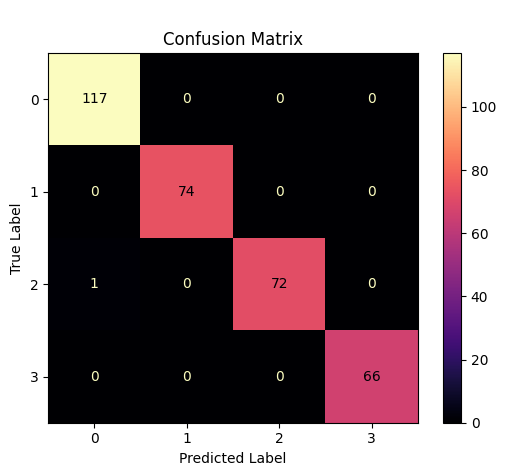

In [124]:
# Print classification report
print("\n\nClassification Report :\n",classification_report(y_test, y_pred , target_names=['Normal', 'Fault 1', 'Fault 2', 'Fault 3']))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot(cmap='magma', colorbar=True)
plt.title("\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#viridis,coolwarm,Greys,magma,'jet', 'rainbow', and 'cividis'


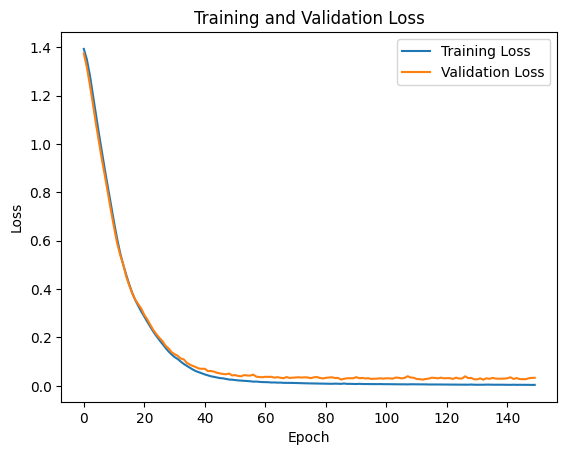

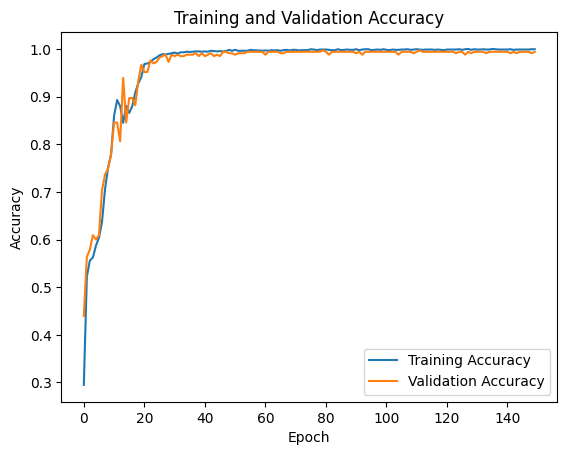

In [125]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Part 4**

## **K-fold**

In [68]:
import numpy as np
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense

# Define the number of folds
k = 5

# Define the number of epochs and batch size
epochs = 50
batch_size = 32

# Define the number of inputs and outputs
num_inputs = X_train.shape[1]
num_outputs = len(np.unique(Y))

# Define the neural network architecture
def create_model():
    model = Sequential()
    model.add(Dense(24, input_dim=num_inputs, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(num_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create the k-fold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the accuracy and loss history
accuracy_history = []
loss_history = []
true_labels = []
predicted_labels = []

# Iterate over the folds
for train_index, test_index in kf.split(X_normalized):

    # Split the data into training and testing sets
    x_train, x_test = X_normalized[train_index], X_normalized[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    # Convert the labels to one-hot encoded format
    Y_train = np.eye(num_outputs)[Y_train.astype(int)]
    Y_test = np.eye(num_outputs)[Y_test.astype(int)]

    # Create the neural network
    model = create_model()

    # Train the neural network and save the history
    history = model.fit(x_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test, Y_test))

    # Append the accuracy and loss history
    accuracy_history.append(history.history['val_accuracy'])
    loss_history.append(history.history['val_loss'])

    # Evaluate the neural network
    _, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print("Accuracy: %.2f%%" % (accuracy*100))

    # Predict the labels for the test set
    predicted_labels.append(np.argmax(model.predict(X_test), axis=1))
    true_labels.append(np.argmax(Y_test, axis=1))

Epoch 1/50
55/55 [==============================] - 1s 7ms/step - loss: 1.3301 - accuracy: 0.4670 - val_loss: 1.2169 - val_accuracy: 0.5636
Epoch 2/50
55/55 [==============================] - 0s 4ms/step - loss: 1.0828 - accuracy: 0.6773 - val_loss: 0.8716 - val_accuracy: 0.6227
Epoch 3/50
55/55 [==============================] - 0s 3ms/step - loss: 0.7856 - accuracy: 0.7341 - val_loss: 0.6148 - val_accuracy: 0.7977
Epoch 4/50
55/55 [==============================] - 0s 4ms/step - loss: 0.5723 - accuracy: 0.7636 - val_loss: 0.4414 - val_accuracy: 0.7977
Epoch 5/50
55/55 [==============================] - 0s 4ms/step - loss: 0.4318 - accuracy: 0.7642 - val_loss: 0.3355 - val_accuracy: 0.8045
Epoch 6/50
55/55 [==============================] - 0s 4ms/step - loss: 0.3195 - accuracy: 0.8716 - val_loss: 0.2385 - val_accuracy: 0.9500
Epoch 7/50
55/55 [==============================] - 0s 3ms/step - loss: 0.2028 - accuracy: 0.9699 - val_loss: 0.1401 - val_accuracy: 0.9818
Epoch 8/50
55/55 [==

In [69]:
# Concatenate the accuracy and loss history
accuracy_history = np.concatenate(accuracy_history)
loss_history = np.concatenate(loss_history)

# Calculate the average accuracy and loss
mean_accuracy = np.mean(accuracy_history)
mean_loss = np.mean(loss_history)

# Calculate and plot the average precision, recall, and F1 score
true_labels = np.concatenate(true_labels)
predicted_labels = np.concatenate(predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print('Average accuracy:', mean_accuracy)
print('Average loss:', mean_loss)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Average accuracy: 0.9631181864738464
Average loss: 0.09972714577615262
Precision: 0.9419717855261762
Recall: 0.9395454545454546
F1 score: 0.9387234506267468


In [130]:
np.shape(predicted_labels)

(2200,)

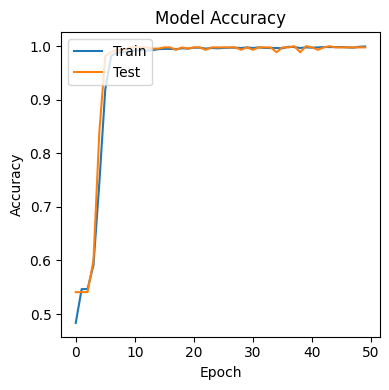

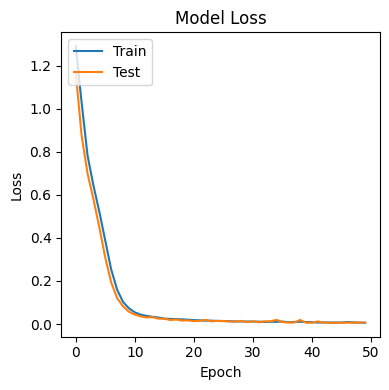

In [74]:
# Plot the model accuracy and loss
plt.figure(figsize=(4,4))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

plt.figure(figsize=(4,4))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

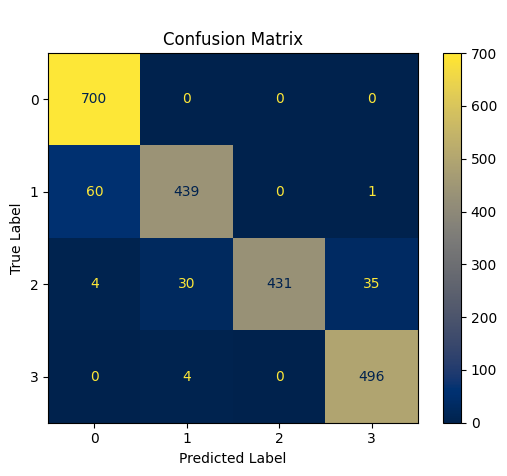

In [131]:
#Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot(cmap='cividis', colorbar=True)
plt.title("\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## **Stratified k-fold**

In [80]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense

# Define the number of folds
k = 5

# Define the number of epochs and batch size
epochs = 50
batch_size = 32

# Define the number of inputs and outputs
num_inputs = X_train.shape[1]
num_outputs = len(np.unique(Y))

# Define the neural network architecture
def create_model():
    model = Sequential()
    model.add(Dense(24, input_dim=num_inputs, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(num_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#**************** Stratified K-Fold Cross-Validation  **********************
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
stratified_kfold_acc = []

# Initialize the accuracy and loss history
accuracy_history = []
loss_history = []
true_labels = []
predicted_labels = []

# Iterate over the folds
for train_index, test_index in stratified_kfold.split(X_normalized,Y):

    # Split the data into training and testing sets
    x_train, x_test = X_normalized[train_index], X_normalized[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    # Convert the labels to one-hot encoded format
    Y_train = np.eye(num_outputs)[Y_train.astype(int)]
    Y_test = np.eye(num_outputs)[Y_test.astype(int)]

    # Create the neural network
    model = create_model()

    # Train the neural network and save the history
    history = model.fit(x_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test, Y_test))

    # Append the accuracy and loss history
    accuracy_history.append(history.history['val_accuracy'])
    loss_history.append(history.history['val_loss'])

    # Evaluate the neural network
    _, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print("Accuracy: %.2f%%" % (accuracy*100))

    # Predict the labels for the test set
    predicted_labels.append(np.argmax(model.predict(X_test), axis=1))
    true_labels.append(np.argmax(Y_test, axis=1))

Epoch 1/50
55/55 [==============================] - 4s 14ms/step - loss: 1.3732 - accuracy: 0.3432 - val_loss: 1.2877 - val_accuracy: 0.3364
Epoch 2/50
55/55 [==============================] - 0s 7ms/step - loss: 1.1993 - accuracy: 0.5051 - val_loss: 1.0809 - val_accuracy: 0.5455
Epoch 3/50
55/55 [==============================] - 0s 6ms/step - loss: 0.9334 - accuracy: 0.5455 - val_loss: 0.8211 - val_accuracy: 0.5455
Epoch 4/50
55/55 [==============================] - 0s 7ms/step - loss: 0.7226 - accuracy: 0.5574 - val_loss: 0.6288 - val_accuracy: 0.6023
Epoch 5/50
55/55 [==============================] - 0s 6ms/step - loss: 0.5278 - accuracy: 0.7665 - val_loss: 0.4330 - val_accuracy: 0.9250
Epoch 6/50
55/55 [==============================] - 0s 8ms/step - loss: 0.3482 - accuracy: 0.9386 - val_loss: 0.2699 - val_accuracy: 0.9591
Epoch 7/50
55/55 [==============================] - 0s 7ms/step - loss: 0.2151 - accuracy: 0.9705 - val_loss: 0.1681 - val_accuracy: 0.9886
Epoch 8/50
55/55 [=

In [82]:
# Concatenate the accuracy and loss history
accuracy_history = np.concatenate(accuracy_history)
loss_history = np.concatenate(loss_history)

# Calculate the average accuracy and loss
mean_accuracy = np.mean(accuracy_history)
mean_loss = np.mean(loss_history)

# Calculate and plot the average precision, recall, and F1 score
true_labels = np.concatenate(true_labels)
predicted_labels = np.concatenate(predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print('Average accuracy:', mean_accuracy)
print('Average loss:', mean_loss)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Average accuracy: 0.9659363676309586
Average loss: 0.10156327379308641
Precision: 0.9416299394071243
Recall: 0.9390909090909091
F1 score: 0.9382472935098998


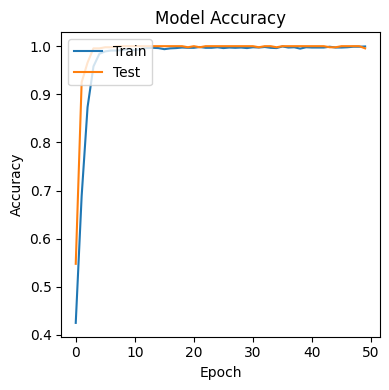

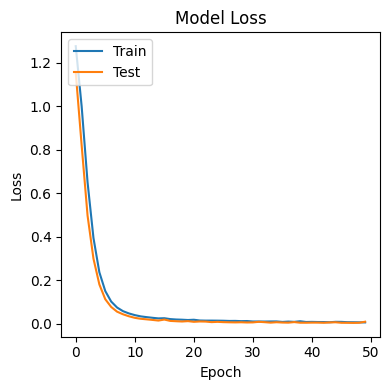

In [83]:
# Plot the model accuracy and loss
plt.figure(figsize=(4,4))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

plt.figure(figsize=(4,4))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

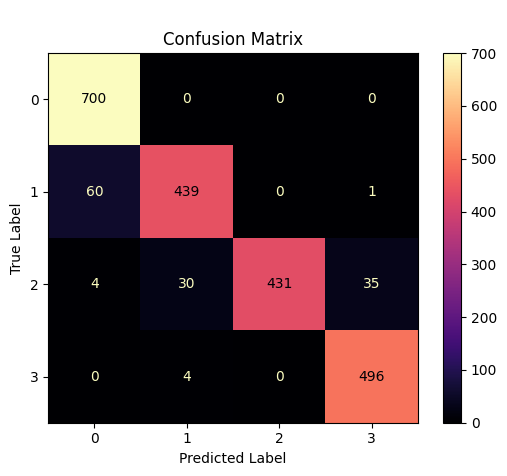

In [86]:
#Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot(cmap='magma', colorbar=True)
plt.title("\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()